# Какие новости показывают на Дзене

12 сентября 2022 года Яндекс закрыл сделку по продаже сервисов "Дзен" и "Новости" компании VK. Теперь при переходе на страницу yandex.ru, пользователи перенаправляются на страницу Дзена dzen.ru. 
На главной странице [Дзена](https://dzen.ru/) есть рубрика "Сейчас в СМИ". 

Какие новости VK выбирает для показа на Дзене?

Цель проекта – с помощью инструментов веб-скрейпинга и обработки естественного языка проанализировать главные новости портала "Дзен".

Ход проекта:
- собрать ссылки из рубрики "Сейчас в СМИ",
- спарсить тексты новостей,
- обработать тексты,
- визуализировать результаты,
- сделать выводы.

Используемые библиотеки: selenium, BeautifulSoup, requests, re, nltk, spacy, wordcloud, matplotlib.

Ключевые слова: веб-скрейпинг, парсинг сайтов, обработка естественного языка, облако слов.

## Сбор информации

Импортируем все используемые библиотеки.

In [37]:
# Импорт библиотек для парсинга.

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup
import requests

# Импорт библиотек для обработки естественного языка.

import re
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist

# Импорт библиотек для визуализации.

from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

С помощью библиотеки selenium откроем главную страницу Дзена.

Эта библиотека позволяет имитировать действия пользователя. В данном случае на главной странице 2 раза нужно нажать на кнопку "Показать ещё", чтобы загрузить все ссылки в категории "Сейчас в СМИ".

In [38]:
# Открываем браузер с помощью библиотеки selenium.

s = Service('chromedriver.exe')
browser = webdriver.Chrome(service = s)

# Передаем ссылку на сайт.

url = 'https://dzen.ru/'
browser.get(url)

# Два раза кликнем на кнопку "Показать ещё", чтобы загрузить все ссылки.

browser.find_element(By.CLASS_NAME, 'card-news__moreButtonText-2W').click()
browser.find_element(By.CLASS_NAME, 'card-news__moreButtonText-2W').click()

С помощью библиотеки BeautifulSoup загружаем данные страницы. На странице найдем ссылки, которые ведут на новости, и соберем их в список links.

In [39]:
# Создаем "суп" из страницы.

soup = BeautifulSoup(browser.page_source, 'lxml')

In [40]:
# Cобираем новости из категории "Сейчас в СМИ".

news = soup.find_all('li', class_='news-story__story-2M')

In [41]:
# Собираем чистые ссылки на новости.

links = []

for piece in news:
    link = piece.find('a').get('href')
    links.append(link)
    print(link)

https://dzen.ru/news/story/Naaehrodrome_podKalugoj_upal_i_vzorvalsya_bespilotnik_postradavshikh_net--0e2fdd0904f9ed564b0ea974c903d26a?lang=ru&from=main_portal&fan=1&stid=6ie_o7Xh3GJ6jl91oMHQ&t=1665139378&persistent_id=241361064&story=7fd686e1-3948-57f4-b27f-d53ce1818621&issue_tld=ru
https://dzen.ru/news/story/Pravitelstvo_FRG_zayavilo_chto_SHolc_vystupaet_protiv_ispolzovaniya_yadernogo_oruzhiya--032c160698ccf8bd07907285b1be1ee1?lang=ru&from=main_portal&fan=1&stid=w56B-UhoXLjrEfEHlXU8&t=1665139378&persistent_id=241361031&story=d3101a14-4de4-5bf1-8613-b5b2b5b9ace2&issue_tld=ru
https://dzen.ru/news/story/Sovfed_odobril_zakon_opredostavlenii_mobilizovannym_kreditnykh_kanikul--42e39a3e46b316553d71e15b858d5340?lang=ru&from=main_portal&fan=1&stid=MLHc6-rIMfdP84i0aai2&t=1665139378&persistent_id=230239099&story=e5475bce-fe88-5fb4-ab90-bb19e0420e74&issue_tld=ru
https://dzen.ru/news/story/Nobelevskuyu_premiyu_mira_poluchili_centr_Memorial_i_ukrainskie_i_belorusskie_aktivisty--a306e025e69cd74d004c

In [42]:
# Добавим headers для возможности поиска по тегам внутри страниц.

headers = {
    'Cookie': 'sso_checked=1',
    'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.5112.79 Safari/537.36'
}

С помощью библиотеки requests обратимся к каждой ссылке из списка links и соберем тексты новостей.

In [43]:
# Собираем тексты новостей в список texts.

texts = []

for link in links:
    page = requests.get(link, headers=headers)
    soup = BeautifulSoup(page.text, 'lxml')
    text = soup.find_all('span', class_='mg-story-summarization')
    for el in text:
        texts.append(el.text)

print(texts)

['Взрыв произошел на аэродроме под Калугой, упал беспилотник, пострадавших нет, ', ' в пятницу губернатор региона ', 'Владислав Шапша', '.', 'Упал беспилотник, предположительно прилетевший со стороны границы.', 'Инфраструктура аэродрома и техника не повреждены.', '«На месте работает следственно-оперативная группа для установления причин и обстоятельств случившегося», - сообщил Шапша.', 'Канцлер Германии ', 'Олаф Шольц', ' выступает против применения ядерного оружия.', 'Позднее пресс-секретарь Зеленского Сергей Никифоров пояснил, что тот не призывал использовать ядерное оружие против РФ, а подразумевал превентивные санкции.', 'Зеленский ранее заявил, что НАТО должно нанести "превентивные" удары по РФ, а не "ждать ядерных ударов России".', 'Официальный представитель генсека ООН ', 'Стефан Дюжаррик', ' ранее также не поддержал украинского лидера, заявив, что даже дискуссии о ядерном конфликте неприемлемы.', 'Сегодня президент РФ Владимир Путин подписал федеральный ', ' о предоставлении кр

In [44]:
# Объединим тексты новостей в один сплошной текст.

texts_new = ''

for text in texts:
    texts_new += ' ' + text

print(texts_new)

 Взрыв произошел на аэродроме под Калугой, упал беспилотник, пострадавших нет,   в пятницу губернатор региона  Владислав Шапша . Упал беспилотник, предположительно прилетевший со стороны границы. Инфраструктура аэродрома и техника не повреждены. «На месте работает следственно-оперативная группа для установления причин и обстоятельств случившегося», - сообщил Шапша. Канцлер Германии  Олаф Шольц  выступает против применения ядерного оружия. Позднее пресс-секретарь Зеленского Сергей Никифоров пояснил, что тот не призывал использовать ядерное оружие против РФ, а подразумевал превентивные санкции. Зеленский ранее заявил, что НАТО должно нанести "превентивные" удары по РФ, а не "ждать ядерных ударов России". Официальный представитель генсека ООН  Стефан Дюжаррик  ранее также не поддержал украинского лидера, заявив, что даже дискуссии о ядерном конфликте неприемлемы. Сегодня президент РФ Владимир Путин подписал федеральный   о предоставлении кредитных каникул для мобилизованных и участников С

Мы собрали тексты новостей, которые и будем обрабатывать.

## Обработка текста

Теперь необходимо очистить текст от лишних знаков и стоп-слов и провести лемматизацию.

In [45]:
# Почистим текст от символов с помощью регулярных выражений. 

pattern = r'[^\w]'
texts_new = re.sub(pattern, ' ', texts_new)

print(texts_new)

 Взрыв произошел на аэродроме под Калугой  упал беспилотник  пострадавших нет    в пятницу губернатор региона  Владислав Шапша   Упал беспилотник  предположительно прилетевший со стороны границы  Инфраструктура аэродрома и техника не повреждены   На месте работает следственно оперативная группа для установления причин и обстоятельств случившегося     сообщил Шапша  Канцлер Германии  Олаф Шольц  выступает против применения ядерного оружия  Позднее пресс секретарь Зеленского Сергей Никифоров пояснил  что тот не призывал использовать ядерное оружие против РФ  а подразумевал превентивные санкции  Зеленский ранее заявил  что НАТО должно нанести  превентивные  удары по РФ  а не  ждать ядерных ударов России   Официальный представитель генсека ООН  Стефан Дюжаррик  ранее также не поддержал украинского лидера  заявив  что даже дискуссии о ядерном конфликте неприемлемы  Сегодня президент РФ Владимир Путин подписал федеральный   о предоставлении кредитных каникул для мобилизованных и участников С

In [46]:
# Проведем лемматизацию с помощью библиотеки spacy.

nlp = spacy.load('ru_core_news_sm')
doc = nlp(texts_new)

lemmas = " ".join([token.lemma_ for token in doc])

print(lemmas)

  взрыв произойти на аэродром под калуга   упасть беспилотник   пострадавших нет     в пятница губернатор регион   владислав шапша    упасть беспилотник   предположительно прилететь со сторона граница   инфраструктура аэродром и техника не повредить    на место работать следственно оперативный группа для установление причина и обстоятельство случиться      сообщить шапша   канцлер германия   олаф шольц   выступать против применение ядерный оружие   позднее пресс секретарь зеленского сергей никифоров пояснить   что тот не призывать использовать ядерный оружие против рф   а подразумевать превентивный санкция   зеленский ранее заявить   что нато должный нанести   превентивный   удар по рф   а не   ждать ядерный удар россия    официальный представитель генсек оон   стефан дюжаррик   ранее также не поддержать украинского лидер   заявить   что даже дискуссия о ядерный конфликт неприемлемы   сегодня президент рф владимир путин подписать федеральный    о предоставление кредитный каникул для мо

In [47]:
# С помощью библиотеки nltk получим токены слов из текста.

text_tokens = nltk.word_tokenize(lemmas)
print(text_tokens)

['взрыв', 'произойти', 'на', 'аэродром', 'под', 'калуга', 'упасть', 'беспилотник', 'пострадавших', 'нет', 'в', 'пятница', 'губернатор', 'регион', 'владислав', 'шапша', 'упасть', 'беспилотник', 'предположительно', 'прилететь', 'со', 'сторона', 'граница', 'инфраструктура', 'аэродром', 'и', 'техника', 'не', 'повредить', 'на', 'место', 'работать', 'следственно', 'оперативный', 'группа', 'для', 'установление', 'причина', 'и', 'обстоятельство', 'случиться', 'сообщить', 'шапша', 'канцлер', 'германия', 'олаф', 'шольц', 'выступать', 'против', 'применение', 'ядерный', 'оружие', 'позднее', 'пресс', 'секретарь', 'зеленского', 'сергей', 'никифоров', 'пояснить', 'что', 'тот', 'не', 'призывать', 'использовать', 'ядерный', 'оружие', 'против', 'рф', 'а', 'подразумевать', 'превентивный', 'санкция', 'зеленский', 'ранее', 'заявить', 'что', 'нато', 'должный', 'нанести', 'превентивный', 'удар', 'по', 'рф', 'а', 'не', 'ждать', 'ядерный', 'удар', 'россия', 'официальный', 'представитель', 'генсек', 'оон', 'сте

In [48]:
# Загрузим стоп-слова для русского языка.

rus_stopwords = stopwords.words('russian')

# Дополним список стоп слов.

rus_stopwords.extend(['также', 'год'])

In [49]:
# Обновим список токенов, исключив из них стоп-слова.

text_tokens_updated = []

for token in text_tokens:
    if token not in rus_stopwords:
        text_tokens_updated.append(token)
        
print(text_tokens_updated)

['взрыв', 'произойти', 'аэродром', 'калуга', 'упасть', 'беспилотник', 'пострадавших', 'пятница', 'губернатор', 'регион', 'владислав', 'шапша', 'упасть', 'беспилотник', 'предположительно', 'прилететь', 'сторона', 'граница', 'инфраструктура', 'аэродром', 'техника', 'повредить', 'место', 'работать', 'следственно', 'оперативный', 'группа', 'установление', 'причина', 'обстоятельство', 'случиться', 'сообщить', 'шапша', 'канцлер', 'германия', 'олаф', 'шольц', 'выступать', 'против', 'применение', 'ядерный', 'оружие', 'позднее', 'пресс', 'секретарь', 'зеленского', 'сергей', 'никифоров', 'пояснить', 'призывать', 'использовать', 'ядерный', 'оружие', 'против', 'рф', 'подразумевать', 'превентивный', 'санкция', 'зеленский', 'ранее', 'заявить', 'нато', 'должный', 'нанести', 'превентивный', 'удар', 'рф', 'ждать', 'ядерный', 'удар', 'россия', 'официальный', 'представитель', 'генсек', 'оон', 'стефан', 'дюжаррик', 'ранее', 'поддержать', 'украинского', 'лидер', 'заявить', 'дискуссия', 'ядерный', 'конфликт

Мы получили список токенов, из которых состоят новости в разделе "Главное в СМИ" на портале Дзена.

## Визуализация

Визуализируем полученные слова.

In [50]:
# Посмотрим на частоту употребления слов.

text = nltk.Text(text_tokens_updated)
fdist = FreqDist(text)
fdist.most_common(10)

[('область', 13),
 ('московский', 13),
 ('россия', 10),
 ('регион', 7),
 ('заявить', 7),
 ('стать', 7),
 ('проект', 7),
 ('ядерный', 6),
 ('удар', 6),
 ('мобилизация', 6)]

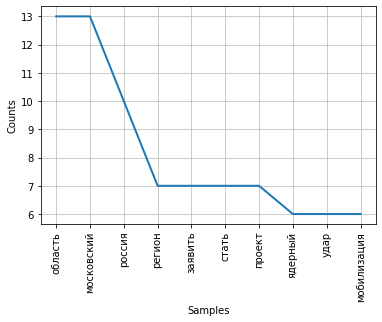

In [51]:
# Изобразим частоту употребления слов на графике.

fdist.plot(10, cumulative=False);

In [52]:
# Переведем слова обратно в текст.

text_raw = " ".join(text)

# Передадим текст для построения облака слов. 

wordcloud = WordCloud(width=1600, height=800).generate(text_raw)

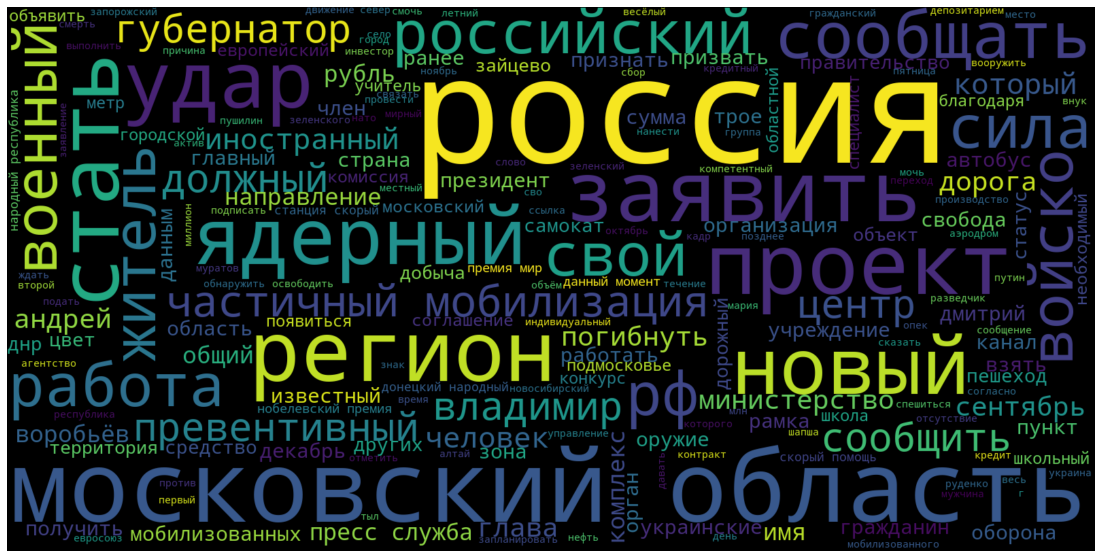

In [53]:
# Отобразим облако слов.

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [54]:
# Сохраним полученное облако в файл.

wordcloud.to_file('results.png');

## Выводы

Инструментами веб-скрейпинга можно собрать тексты новостей, а инструментами обработки естественного языка - найти главные слова, из которых создали новости.

На главной странице Дзена новости постоянно обновляются, и проект показывает состояние новостей здесь и сейчас. При новых итерациях облако слов будет изменяться.

На 07.10.2022 14:00 по Московскому времени, актуальные темы на Дзене: 
Московская область, Россия, регион, проект, **ядерный удар**, мобилизация.

Все эти инструменты можно применить и к другим источникам, а потом сравнить результаты. 